In [19]:
import os

train_path = os.path.abspath("fruits-360/Training")
test_path = os.path.abspath("fruits-360/Test")

In [2]:
!ls fruits-360/Training | wc -l # the amount of files in the folder
a = !ls fruits-360/Training
print(a[0])
print(a[130])

     131
Apple Braeburn
Watermelon


In [155]:
from random import sample

# check the amount of files in the folder. if there is only 100 files in the folder, skip it
# so all folders will have 100 pics in them.

# maybe you can write a function later for practice that removes files till there's a select
# amount of files
# cause right now i have like 35 images in every folder, which might not be enough for training

# like a while loop that checks all folders. and while at least one of the folders has
# more than 100 images in it, the whole code runs

def reduce_folder_size_by_increment(files, path, allowed_min, incr):
    i = 0
    for fruit in files:
        if len(os.listdir(os.path.join(path,fruit)))- incr < allowed_min:
                continue
        for photo in sample(os.listdir(os.path.join(path,fruit)), incr):
            if os.path.exists(os.path.join(path,fruit)):
                os.remove(path+"/"+fruit+"/"+photo)
                i+= 1
            else:
                i+= 1
    print(f"{i} photos were removed in this function run.")
files = os.listdir(train_path)
files.remove(".DS_Store")


In [164]:
# this lists every single folder
# .ds_store is some weird internal folder
reduce_folder_size_by_increment(files, train_path, 100, 100)


0 photos were removed in this function run.


In [167]:
reduce_folder_size_by_increment(files, test_path, 100, 100)


0 photos were removed in this function run.


In [6]:
# prints the amount of files in each folder
mn = 20
folders = ([name for name in os.listdir(test_path)
            if os.path.isdir(os.path.join(test_path, name))]) # get all directories 
for folder in folders:
    contents = os.listdir(os.path.join(test_path,folder)) # get list of contents
    if len(contents) > mn: # if greater than the limit, print folder and number of contents
        print(folder,len(contents))

Tomato 4 160
Apple Red Delicious 166
Tomato 3 146
Huckleberry 166
Blueberry 154
Pear Red 122
Banana Lady Finger 152
Melon Piel de Sapo 146
Pear 164
Cherry 1 164
Strawberry 164
Nut Forest 118
Avocado 143
Tomato 2 125
Pomegranate 164
Dates 166
Carambula 166
Potato Red Washed 151
Granadilla 166
Kohlrabi 157
Tamarillo 166
Pepper Red 122
Fig 134
Ginger Root 99
Kiwi 156
Cherry Wax Yellow 164
Lemon 164
Guava 166
Apple Golden 2 164
Pear Stone 137
Apple Red 1 164
Cauliflower 134
Mandarine 166
Quince 166
Strawberry Wedge 146
Pear Monster 166
Raspberry 166
Pitahaya Red 166
Nut Pecan 178
Apple Golden 3 161
Redcurrant 164
Apple Red Yellow 1 164
Pepper Yellow 122
Grape Pink 164
Banana Red 166
Cucumber Ripe 2 156
Physalis 164
Cherry Rainier 146
Maracuja 166
Chestnut 153
Plum 151
Potato Sweet 150
Cucumber Ripe 130
Hazelnut 157
Nectarine 164
Cherry Wax Black 164
Cantaloupe 2 164
Lychee 166
Pepper Orange 134
Clementine 166
Watermelon 157
Pear Kaiser 102
Mangostan 102
Cherry 2 146
Pineapple Mini 163
Ramb

In [169]:
mn = 20
folders = ([name for name in os.listdir(train_path)
            if os.path.isdir(os.path.join(train_path, name))]) # get all directories 
for folder in folders:
    contents = os.listdir(os.path.join(train_path,folder)) # get list of contents
    if len(contents) > mn: # if greater than the limit, print folder and number of contents
        print(folder,len(contents))

Tomato 4 148
Apple Red Delicious 160
Tomato 3 108
Huckleberry 160
Blueberry 132
Pear Red 136
Banana Lady Finger 120
Melon Piel de Sapo 108
Pear 162
Cherry 1 162
Strawberry 162
Nut Forest 124
Avocado 197
Tomato 2 142
Pomegranate 162
Dates 160
Carambula 160
Potato Red Washed 123
Granadilla 190
Kohlrabi 171
Tamarillo 190
Pepper Red 166
Fig 102
Ginger Root 197
Kiwi 166
Cherry Wax Yellow 192
Lemon 192
Guava 190
Apple Golden 2 192
Pear Stone 111
Apple Red 1 192
Cauliflower 102
Mandarine 190
Quince 190
Strawberry Wedge 138
Pear Monster 190
Raspberry 190
Pitahaya Red 190
Nut Pecan 134
Apple Golden 3 181
Redcurrant 192
Apple Red Yellow 1 192
Pepper Yellow 166
Grape Pink 192
Banana Red 190
Cucumber Ripe 2 168
Physalis 192
Cherry Rainier 138
Maracuja 190
Chestnut 150
Plum 147
Potato Sweet 150
Cucumber Ripe 192
Hazelnut 164
Nectarine 192
Cherry Wax Black 192
Cantaloupe 2 192
Lychee 190
Pepper Orange 102
Clementine 190
Watermelon 175
Pear Kaiser 100
Mangostan 100
Cherry 2 138
Pineapple Mini 193
Ram

In [20]:
# this overfits to the train set even with the dropout layers
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(131, activation='softmax') # 131 classes
])

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 128)      

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(1/255) # normalize the data
test_datagen = ImageDataGenerator(1/255)
# https://keras.io/api/preprocessing/image/
# generate batches of tensor image data with real-time data augmentation

In [22]:
train_generator = train_datagen.flow_from_directory(
        train_path,  # This is the source directory for training images  # All images will be resized to 150x150
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        test_path,
        batch_size=50,
        class_mode='categorical')
# flow_from_directory can be used if the directory is set up as train and test folders, 
# both folders have folders inside of images for each class

Found 21952 images belonging to 131 classes.
Found 20188 images belonging to 131 classes.


In [37]:
history = model.fit(
      train_generator,
      shuffle  = True,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

# overfits to the training set, tests badly on val
# added dropout to every layer, the model is shit now. accuracy < 20% on 5 epochs
# reduced the dropout and removed the dropout from the final layer

Epoch 1/10
100/100 - 318s - loss: 14.6219 - accuracy: 0.0324 - val_loss: 4.4446 - val_accuracy: 0.0692
Epoch 2/10
100/100 - 347s - loss: 4.2792 - accuracy: 0.0930 - val_loss: 4.0034 - val_accuracy: 0.1204
Epoch 3/10
100/100 - 309s - loss: 3.7992 - accuracy: 0.1556 - val_loss: 3.6148 - val_accuracy: 0.2032
Epoch 4/10
100/100 - 328s - loss: 3.2147 - accuracy: 0.2508 - val_loss: 3.2135 - val_accuracy: 0.2500
Epoch 5/10
100/100 - 280s - loss: 2.7412 - accuracy: 0.3304 - val_loss: 2.9257 - val_accuracy: 0.2928
Epoch 6/10
100/100 - 270s - loss: 2.3157 - accuracy: 0.4064 - val_loss: 3.2711 - val_accuracy: 0.2220
Epoch 7/10
100/100 - 271s - loss: 1.9393 - accuracy: 0.4882 - val_loss: 2.3976 - val_accuracy: 0.4004
Epoch 8/10
100/100 - 295s - loss: 1.5759 - accuracy: 0.5699 - val_loss: 2.3270 - val_accuracy: 0.4136
Epoch 9/10
100/100 - 306s - loss: 1.3892 - accuracy: 0.6144 - val_loss: 1.9157 - val_accuracy: 0.4992
Epoch 10/10
100/100 - 326s - loss: 1.1010 - accuracy: 0.6838 - val_loss: 1.8579 -

In [23]:
# saving the model for future use
#model.save("fruits.h5")
from tensorflow.keras.models import load_model
model = load_model("fruits.h5")
# model trained for  10 + 20 epochs, acc. about 75% on the validation set
# 50 epochs, accuracy 77-80 on the validation set.
# how can i test the accuracy on the test set? like what call do i need to pass to the api?

In [15]:
# additional training
history1 = model.fit(
      train_generator,
      steps_per_epoch=50, # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
      epochs=100,
      initial_epoch = 70,
      validation_data=validation_generator,
      shuffle = True, # this shuffles the data in the directories.
      validation_steps=10, # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch 
      verbose=2)

Epoch 71/100
50/50 - 133s - loss: 0.1542 - accuracy: 0.9511 - val_loss: 0.4859 - val_accuracy: 0.8760
Epoch 72/100
50/50 - 129s - loss: 0.1636 - accuracy: 0.9494 - val_loss: 0.4554 - val_accuracy: 0.8840
Epoch 73/100
50/50 - 128s - loss: 0.1584 - accuracy: 0.9460 - val_loss: 0.4949 - val_accuracy: 0.8920
Epoch 74/100
50/50 - 127s - loss: 0.1344 - accuracy: 0.9544 - val_loss: 0.6028 - val_accuracy: 0.8400
Epoch 75/100
50/50 - 125s - loss: 0.1747 - accuracy: 0.9504 - val_loss: 0.5550 - val_accuracy: 0.8540
Epoch 76/100
50/50 - 125s - loss: 0.1544 - accuracy: 0.9536 - val_loss: 0.5407 - val_accuracy: 0.8680
Epoch 77/100
50/50 - 125s - loss: 0.2176 - accuracy: 0.9486 - val_loss: 0.7061 - val_accuracy: 0.8240
Epoch 78/100
50/50 - 123s - loss: 0.1890 - accuracy: 0.9452 - val_loss: 0.3209 - val_accuracy: 0.8940
Epoch 79/100
50/50 - 125s - loss: 0.3245 - accuracy: 0.9124 - val_loss: 0.5052 - val_accuracy: 0.8700
Epoch 80/100
50/50 - 125s - loss: 0.2410 - accuracy: 0.9340 - val_loss: 0.5510 - v

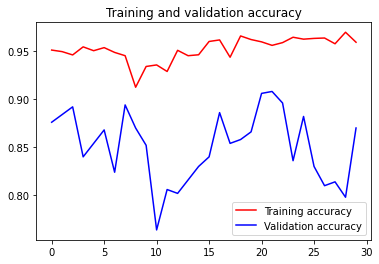

<Figure size 432x288 with 0 Axes>

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [35]:
# testing the saved h5 loaded model on a custom image and printing the prediction. 

import numpy as np
from keras.preprocessing import image
import keras

img_height, img_width = 256, 256
class_names = list(train_generator.class_indices.keys())

#sunflower_path = os.path.abspath("fruits-360/Test/Cauliflower/9_100.jpg")
#sunflower_path = os.path.abspath("fruits-360/mah_test/coconut2.jpeg")
sunflower_path = os.path.abspath("fruits-360/test-multiple_fruits/salak.jpg")

#sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Pear Abate with a 2.03 percent confidence.


In [234]:
# saving a model with json. h5 does everything i might need it to do, but still. here's the code for that
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
model_loaded = tf.keras.models.model_from_json("~/model_json")

model.save_weights("model.h5")

In [ ]:
# https://cv-tricks.com/tensorflow-tutorial/save-restore-tensorflow-models-quick-complete-tutorial/
# backing the model up every 2 hours while it's training

In [50]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data


NameError: name 'x_test' is not defined

In [51]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

NameError: name 'test_dataset' is not defined

In [52]:
# unrelated, this is for the app project
!wget "https://raw.githubusercontent.com/AnnBkrv/dlaicourse/master/TensorFlow%20Deployment/Course%202%20-%20TensorFlow%20Lite/Week%203/Examples/iOS%20Apps/cats_vs_dogs/Podfile"

--2020-09-02 08:42:49--  https://raw.githubusercontent.com/AnnBkrv/dlaicourse/master/TensorFlow%20Deployment/Course%202%20-%20TensorFlow%20Lite/Week%203/Examples/iOS%20Apps/cats_vs_dogs/Podfile
Resolving raw.githubusercontent.com... 151.101.12.133
Connecting to raw.githubusercontent.com|151.101.12.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317 [text/plain]
Saving to: 'Podfile'

Podfile             100%[===================>]     317  --.-KB/s    in 0s      

2020-09-02 08:42:50 (8.40 MB/s) - 'Podfile' saved [317/317]

